## DAT 5303 MACHINE LEARNING COURSE CASE: APPRENTICE CHEF 

**Made by**: Cihat Burak Zorlu, MSBA-2 
**Date**: 18 January 2021

Importing All necessary Tools and Libraries

In [1]:
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import random as rand # random number generation
from sklearn.model_selection import train_test_split # train test split tool
from sklearn.linear_model import LinearRegression, Lasso, ARDRegression # regression equations
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # Standard Scaler

In [2]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
file = "./Apprentice_Chef_Dataset.xlsx"

In [3]:
df_chef = pd.read_excel(file)

In [4]:
# formatting and printing the dimensions of the original dataset
print(f"""
Size of Apprentice Chef Dataset
------------------------
Observations: {df_chef.shape[0]}
Features:     {df_chef.shape[1]}
""")


Size of Apprentice Chef Dataset
------------------------
Observations: 1946
Features:     28



In [5]:
#getting the required information about the each column/variable/feature
df_chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

For further investigation and analysis, Apprentice Chef data was uploaded and started running. First of all we need to identify the problem. In order to fully embrace and tackle the problem we need to understand our observations and features. "df_chef.info()" function allowed me to understand the features' types. 

In [6]:
#rather than plotting a graph, to benefit from time, 
#using describe would also inform me about the skeweness of the REVENUE
#we can say that REVENUE has a positive skew, which means that it's mean is higher than it's median 
df_chef["REVENUE"].describe().round(decimals = 2)

count    1946.00
mean     2107.29
std      1138.29
min       131.00
25%      1350.00
50%      1740.00
75%      2670.00
max      8793.75
Name: REVENUE, dtype: float64

In [7]:
continuous_data = ["REVENUE",  "TOTAL_MEALS_ORDERED", 
                    "UNIQUE_MEALS_PURCH", "CONTACTS_W_CUSTOMER_SERVICE",  
                    "AVG_CLICKS_PER_VISIT", "TOTAL_PHOTOS_VIEWED" ]

chef_corr = df_chef[continuous_data].corr("pearson")
chef_corr.loc[ : , "REVENUE"].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
CONTACTS_W_CUSTOMER_SERVICE    0.10
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64

### BASIC MODEL 

I have identified some of the important features, from my perspective, which might have correlation with our Y-variable which is Revenue. I have selected and started my analysis of the data with some continuous variables such as; Total meals ordered, total photos viewed, contacts with customer service, unique meal purchases and average click per visit. I have run a correlation which targets "Revenue". Correlation results allowed me to understand my model and lead me into my basic model. 

In [8]:
#Creating a base model with Y-Variable as Revenue and X-Variable as Total meals ordered
#which has the highest correlation 
#INSTANTIATE a model object
lm_1 = smf.ols(formula = """REVENUE ~ TOTAL_MEALS_ORDERED""",
                  data = df_chef)
# FIT the data into the model object
results_lm1 = lm_1.fit()
# analyze the SUMMARY output
print(results_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1096.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          4.99e-191
Time:                        23:13:06   Log-Likelihood:                -16020.
No. Observations:                1946   AIC:                         3.204e+04
Df Residuals:                    1944   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1184.9468    

From the basic analysis of only with Total meals ordered, which has the highest correlation with the Revenue, we can say that even though our p value is statistically significant, our model is not very good because of the adjusted R^2 score of 0.36. We can say that our basic model cannot fully answer our question. 

In [9]:
lm_2 = smf.ols(formula = """REVENUE ~ TOTAL_MEALS_ORDERED +
                    CONTACTS_W_CUSTOMER_SERVICE + AVG_PREP_VID_TIME + 
                    TOTAL_PHOTOS_VIEWED + MEDIAN_MEAL_RATING + MASTER_CLASSES_ATTENDED + 
                    LARGEST_ORDER_SIZE + AVG_TIME_PER_SITE_VISIT""", 
              data = df_chef)
results_lm2 = lm_2.fit()
print(results_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     393.1
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -15517.
No. Observations:                1946   AIC:                         3.105e+04
Df Residuals:                    1937   BIC:                         3.110e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Our base model become better with adjusted R^2 of 0.617 while all of my variables are statistically significant. 

In [10]:
#only missing data is at family name feature, which is not very relevant to our goal
#we don't need to remove the missing values at this point
df_chef.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

### TRANSFORMATION

In [11]:
# log transforming REVENUE and saving it to the dataset as log_REVENUE
# since our Y- variable is skewed, we want to normalize it as much as we can 
#we transform it into logarithmic form 
#while transforming some Y variables which are also skewed
df_chef['log_REVENUE'] = np.log10(df_chef['REVENUE'])
df_chef['log_TOTAL_MEALS_ORDERED'] = np.log10(df_chef['TOTAL_MEALS_ORDERED'])
df_chef['log_MEDIAN_MEAL_RATING'] = np.log10(df_chef['MEDIAN_MEAL_RATING'])
df_chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(df_chef['CONTACTS_W_CUSTOMER_SERVICE'])
df_chef['log_AVG_PREP_VID_TIME'] = np.log10(df_chef['AVG_PREP_VID_TIME'])
df_chef['log_UNIQUE_MEALS_PURCH'] = np.log10(df_chef['UNIQUE_MEALS_PURCH'])

In [12]:
lm_log = smf.ols(formula = """log_REVENUE ~ TOTAL_MEALS_ORDERED +
                    CONTACTS_W_CUSTOMER_SERVICE + AVG_PREP_VID_TIME + 
                    TOTAL_PHOTOS_VIEWED + MEDIAN_MEAL_RATING + MASTER_CLASSES_ATTENDED + 
                    LARGEST_ORDER_SIZE + AVG_TIME_PER_SITE_VISIT""", 
              data = df_chef)
results_lm_log= lm_log.fit()
print(results_lm_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     437.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                 1264.0
No. Observations:                1946   AIC:                            -2510.
Df Residuals:                    1937   BIC:                            -2460.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Revenue is our Y- Variable and is skewed. By logarithmicly transforming our variable we wanted have a variable which is more normally distributed(not very skewed). This transformation will be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

In [13]:
#count of each cancellation 
print(f"""
Count of each Cancellation 
==================
----------
Cancellation Before Noon
----------
{df_chef['CANCELLATIONS_BEFORE_NOON'].value_counts(normalize = False).sort_index()}
----------
Cancellations After Noon
----------
{df_chef['CANCELLATIONS_AFTER_NOON'].value_counts(normalize = False).sort_index()}
""")


Count of each Cancellation 
----------
Cancellation Before Noon
----------
0     667
1     567
2     331
3     189
4     105
5      43
6      23
7      11
8       7
9       1
10      1
13      1
Name: CANCELLATIONS_BEFORE_NOON, dtype: int64
----------
Cancellations After Noon
----------
0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64



### COMBINE DATA , GET DUMMIES, TEST CORRELATION

In [14]:
df_chef["TOTAL_CANCELLATION"] = df_chef["CANCELLATIONS_BEFORE_NOON"] + df_chef["CANCELLATIONS_AFTER_NOON"]/2

In [15]:
df_chef["TOTAL_LOGINS"] = df_chef["PC_LOGINS"] + df_chef["MOBILE_LOGINS"]
df_chef["TOTAL_LOGINS"]

0       7
1       6
2       7
3       7
4       6
       ..
1941    7
1942    6
1943    7
1944    7
1945    8
Name: TOTAL_LOGINS, Length: 1946, dtype: int64

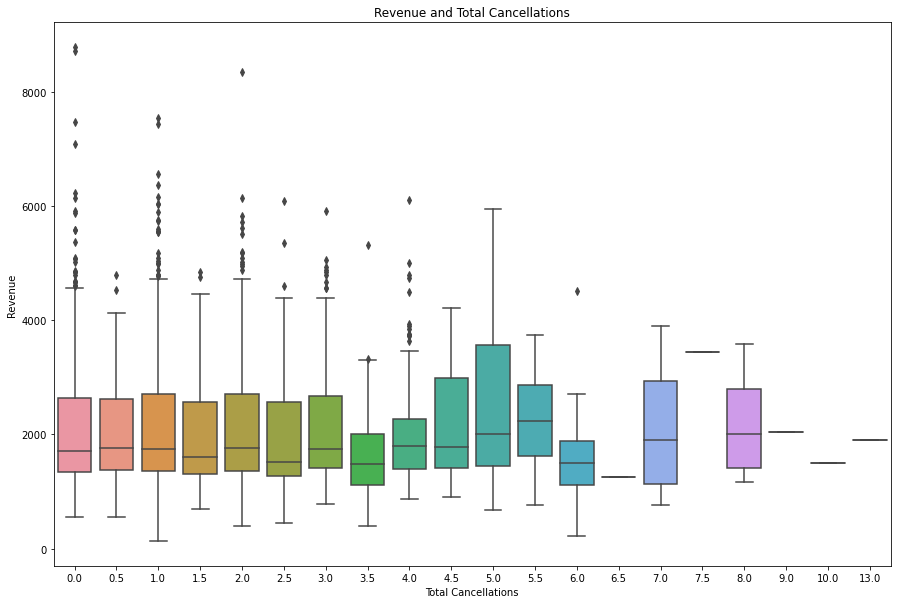


Cancellation
-----------
Total Cancellations
-----------
0.0     572
0.5      82
1.0     514
1.5      54
2.0     280
2.5      54
3.0     169
3.5      25
4.0      88
4.5      20
5.0      39
5.5       4
6.0      22
6.5       1
7.0      11
7.5       1
8.0       7
9.0       1
10.0      1
13.0      1
Name: TOTAL_CANCELLATION, dtype: int64
---------------------
Cancellation Correlations
---------------------
CANCELLATIONS_BEFORE_NOON    0.01
CANCELLATIONS_AFTER_NOON    -0.04
TOTAL_CANCELLATION           0.01
REVENUE                      1.00
Name: REVENUE, dtype: float64



In [16]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))
# developing a boxplot
sns.boxplot(x    = "TOTAL_CANCELLATION",
            y    = "REVENUE",
            data = df_chef)
# titles and labels
plt.title(label   = 'Revenue and Total Cancellations')
plt.xlabel(xlabel = 'Total Cancellations')
plt.ylabel(ylabel = 'Revenue')
# displaying the plot
plt.tight_layout
plt.show()
# developing a correlation matrix
cancellation_corr = df_chef.loc[ : , ['CANCELLATIONS_BEFORE_NOON',
                              'CANCELLATIONS_AFTER_NOON',
                              'TOTAL_CANCELLATION',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)
# printing value counts and correlations bathrooms
print(f"""
Cancellation
=========
-----------
Total Cancellations
-----------
{df_chef['TOTAL_CANCELLATION'].value_counts(normalize = False).sort_index()}
---------------------
Cancellation Correlations
---------------------
{cancellation_corr['REVENUE']}
""")

There were two features called CANCELLATIONS_BEFORE_NOON and CANCELLATIONS_AFTER_NOON. So i wanted to combine them into one column. Then checked whether there is a correlation with total cancellation and Revenue. However, I fail to find a good correlation result between two. 

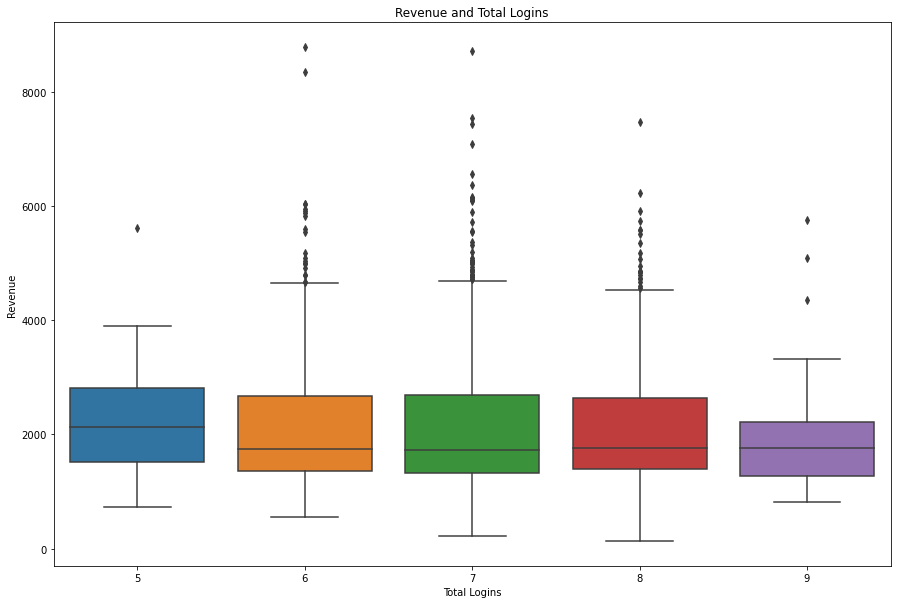


Logins

-----------
Total Logins
-----------
5     31
6    493
7    906
8    492
9     24
Name: TOTAL_LOGINS, dtype: int64


---------------------
Login Correlations
---------------------
PC_LOGINS        0.02
MOBILE_LOGINS   -0.02
TOTAL_LOGINS    -0.00
REVENUE          1.00
Name: REVENUE, dtype: float64




In [17]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))
# developing a boxplot
sns.boxplot(x    = "TOTAL_LOGINS",
            y    = "REVENUE",
            data = df_chef)
# titles and labels
plt.title(label   = 'Revenue and Total Logins')
plt.xlabel(xlabel = 'Total Logins')
plt.ylabel(ylabel = 'Revenue')
# displaying the plot
plt.tight_layout
plt.show()
## the following code has been written for you ##
# developing a correlation matrix
login_corr = df_chef.loc[ : , ['PC_LOGINS',
                              'MOBILE_LOGINS',
                              'TOTAL_LOGINS',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)
# printing value counts and correlations bathrooms
print(f"""
Logins
=========

-----------
Total Logins
-----------
{df_chef['TOTAL_LOGINS'].value_counts(normalize = False).sort_index()}


---------------------
Login Correlations
---------------------
{login_corr['REVENUE']}

""")

There were two features called PC_LOGINS and MOBILE_LOGINS. So i wanted to combine them into one column. Then checked whether there is a correlation with total logins and Revenue. However, I fail to find a good correlation result between two. 

In [18]:
chef_explanatory = df_chef.copy()
# dropping 
chef_explanatory = chef_explanatory.drop([       'REVENUE',
                                                 'NAME',
                                                 'FIRST_NAME',
                                                 'EMAIL', 
                                                 'FAMILY_NAME'], axis = 1)
# formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(val, "+")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
log_REVENUE +
log_TOTAL_MEALS_ORDERED +
log_MEDIAN_MEAL_RATING +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_AVG_PREP_VID_TIME +
log_UNIQUE_MEALS_PURCH +
TOTAL_CANCELLATION +
TOTAL_LOGINS +


In [19]:
lm_full = smf.ols(formula = """REVENUE ~ CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
log_REVENUE +
TOTAL_CANCELLATION +
TOTAL_LOGINS""",
                               data = df_chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     919.8
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -13998.
No. Observations:                1946   AIC:                         2.805e+04
Df Residuals:                    1921   BIC:                         2.819e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.426e+04    235.986    -60.444      0.000   -1.47e+04   -1.38e+04
CROSS_SELL_SUCCESS            -20.6208     16.225     -1.271      0.204     -52.441      11.200
TOTAL_MEALS_ORDERED             0.7187      0.177      4.058      0.000       0.371       1.066
UNIQUE_MEALS_PURCH             -3.0275      3.105     -0.975      0.330      -9.117       3.062
CONTACTS_W_CUSTOMER_SERVICE    64.8047      3.307     19.598      0.000      58.319      71.290
PRODUCT_CATEGORIES_VIEWED       0.8615      2.432      0.354      0.723      -3.908       5.631
AVG_TIME_PER_SITE_VISIT         0.0825      0.125      0.657      0.511      -0.163       0.328
MOBILE_NUMBER                 -24.4118     22.725     -1.074      0.283     -68.980      20.156
CANCELLATIONS_BEFORE_NOON      -1.4492      4.700     -0.308      0.758     -10.667       7.768
CANCELLATIONS_AFTER_NOON        6.4141     15.290      0.419      0.675     -23.573      36.401
TASTES_AND_PREFERENCES         -1.5043     16.418     -0.092      0.927     -33.704      30.695
PC_LOGINS                      11.2602      9.721      1.158      0.247      -7.804      30.325
MOBILE_LOGINS                 -13.3137     10.310     -1.291      0.197     -33.533       6.906
WEEKLY_PLAN                    -0.0234      0.545     -0.043      0.966      -1.092       1.045
EARLY_DELIVERIES                6.3620      3.184      1.998      0.046       0.117      12.607
LATE_DELIVERIES                 7.1140      2.692      2.643      0.008       1.835      12.393
PACKAGE_LOCKER                 12.3900     17.624      0.703      0.482     -22.174      46.954
REFRIGERATED_LOCKER            28.8581     26.630      1.084      0.279     -23.369      81.085
AVG_PREP_VID_TIME               0.6881      0.316      2.175      0.030       0.068       1.309
LARGEST_ORDER_SIZE             -8.3152      8.123     -1.024      0.306     -24.245       7.615
MASTER_CLASSES_ATTENDED       -11.4826     13.644     -0.842      0.400     -38.241      15.276
MEDIAN_MEAL_RATING            -71.9234     20.497     -3.509      0.000    -112.122     -31.724
AVG_CLICKS_PER_VISIT          -11.9614      6.176     -1.937      0.053     -24.075       0.152
TOTAL_PHOTOS_VIEWED             0.2838      0.047      6.042      0.000       0.192       0.376
log_REVENUE                  4925.5519     60.155     81.881      0.000    4807.576    5043.528
TOTAL_CANCELLATION              1.7579      4.342      0.405      0.686      -6.758      10.274
TOTAL_LOGINS                   -2.0535      6.294     -0.326      0.744     -14.398      10.291
==============================================================================
Omnibus:                     1616.100   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarqu

In [20]:
lm_full_1 = smf.ols(formula = """REVENUE ~ 
TOTAL_MEALS_ORDERED +
CONTACTS_W_CUSTOMER_SERVICE + 
AVG_PREP_VID_TIME + 
TOTAL_PHOTOS_VIEWED + 
MEDIAN_MEAL_RATING + 
MASTER_CLASSES_ATTENDED + 
LARGEST_ORDER_SIZE + 
AVG_TIME_PER_SITE_VISIT""",
                               data = df_chef)


# telling Python to run the data through the blueprint
results_full_1 = lm_full_1.fit()


# printing the results
results_full_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     393.1
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -15517.
No. Observations:                1946   AIC:                         3.105e+04
Df Residuals:                    1937   BIC:                         3.110e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    -759.2393     89.113     -8.520      0.000    -934.007    -584.471
TOTAL_MEALS_ORDERED             5.1827      0.357     14.515      0.000       4.482       5.883
CONTACTS_W_CUSTOMER_SERVICE    41.5677      7.117      5.840      0.000      27.609      55.526
AVG_PREP_VID_TIME               9.5429      0.645     14.806      0.000       8.279      10.807
TOTAL_PHOTOS_VIEWED             0.7227      0.101      7.140      0.000       0.524       0.921
MEDIAN_MEAL_RATING            397.5806     26.039     15.269      0.000     346.513     448.648
MASTER_CLASSES_ATTENDED       177.6569     29.086      6.108      0.000     120.614     234.700
LARGEST_ORDER_SIZE            -98.7392     17.456     -5.657      0.000    -132.973     -64.505
AVG_TIME_PER_SITE_VISIT        -1.0510      0.268     -3.916      0.000      -1.577      -0.525
==============================================================================
Omnibus:                      802.706   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8939.024
Skew:                           1.623   Prob(JB):                         0.00
Kurtosis:                      12.985   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I wanted to check whether there is a correlation between Revenue and the email domain name used by every user. So I ran this code. 

In [21]:
# placeholder list to store the emails 
placeholder_lst = []

# looping over each email address
for index, col in df_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = df_chef.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
df_chef_email = pd.DataFrame(placeholder_lst)
# displaying the results
df_chef["EMAIL_DOMAIN"] = df_chef_email[1]

In [22]:
df_chef["EMAIL_DOMAIN"].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
jnj.com              28
merck.com            28
mcdonalds.com        28
apple.com            27
nike.com             27
ibm.com              26
dupont.com           26
ge.org               26
microsoft.com        25
chevron.com          25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
verizon.com          22
caterpillar.com      22
mmm.com              22
pg.com               22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: EMAIL_DOMAIN, dtype: int64

I have come up with the list of name of each email domain and how many users are using it. 

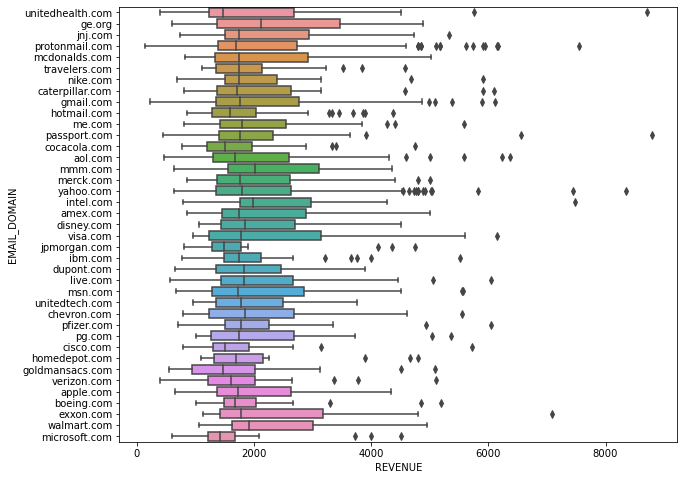

In [23]:
def categorical_boxplots(response, cat_var, data):
    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()
categorical_boxplots( response = "REVENUE", cat_var = "EMAIL_DOMAIN", data = df_chef)

In [24]:
EMAIL_DUMMIES = pd.get_dummies(df_chef["EMAIL_DOMAIN"])
df_chef = df_chef.drop("EMAIL_DOMAIN", axis = 1)
df_chef = df_chef.join([EMAIL_DUMMIES])

In [25]:
df_chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'log_TOTAL_MEALS_ORDERED', 'log_MEDIAN_MEAL_RATING', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_AVG_PREP_VID_TIME', 'log_UNIQUE_MEALS_PURCH', 'TOTAL_CANCELLATION', 'TOTAL_LOGINS', 'amex.com', 'aol.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 'gmail.com', 'goldmansacs.com', 'homedepot.com',
       'hotma

In [26]:
email_corr = df_chef.loc[ : , ['amex.com', 'aol.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 'gmail.com', 'goldmansacs.com', 'homedepot.com', 'hotmail.com', 'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 'live.com', 'mcdonalds.com', 'me.com', 'merck.com', 'microsoft.com', 'mmm.com',
       'msn.com', 'nike.com', 'passport.com', 'pfizer.com', 'pg.com', 'protonmail.com', 'travelers.com', 'unitedhealth.com', 'unitedtech.com', 'verizon.com', 'visa.com', 'walmart.com', 'yahoo.com', 'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)
email_corr["REVENUE"]

amex.com            0.01
aol.com            -0.01
apple.com          -0.01
boeing.com         -0.01
caterpillar.com     0.02
chevron.com         0.01
cisco.com          -0.02
cocacola.com       -0.04
disney.com          0.00
dupont.com         -0.02
exxon.com           0.04
ge.org              0.03
gmail.com          -0.01
goldmansacs.com    -0.02
homedepot.com      -0.00
hotmail.com        -0.04
ibm.com             0.00
intel.com           0.04
jnj.com             0.02
jpmorgan.com       -0.02
live.com            0.01
mcdonalds.com       0.00
me.com             -0.01
merck.com          -0.00
microsoft.com      -0.04
mmm.com             0.01
msn.com            -0.00
nike.com           -0.00
passport.com       -0.00
pfizer.com          0.01
pg.com              0.01
protonmail.com      0.01
travelers.com      -0.01
unitedhealth.com    0.01
unitedtech.com     -0.01
verizon.com        -0.02
visa.com            0.04
walmart.com         0.02
yahoo.com           0.01
REVENUE             1.00


Created email dummy variable to see the correlation of EACH domain name and Revenue. I found some interesting correlations even though the correlations are not high. 

### TRAIN TEST SPLIT DATA 

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.
The first subset is used to fit the model and is referred to as the training dataset. 
The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.
In this analysis we have used 75% Training and 25% Test data with random state of 219. 
Prepared my data for further analysis. 
1) OLS
2) LASSO
3) ARD
4) KNN

In [27]:
# Preparing my data for train&test split
x_variables = ['log_TOTAL_MEALS_ORDERED', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_AVG_PREP_VID_TIME', 
               'TOTAL_PHOTOS_VIEWED', 'log_MEDIAN_MEAL_RATING', 'MASTER_CLASSES_ATTENDED', 'log_UNIQUE_MEALS_PURCH',
               'LARGEST_ORDER_SIZE', 'AVG_TIME_PER_SITE_VISIT', 'visa.com', 'microsoft.com', 
              'intel.com', 'hotmail.com', 'exxon.com', 'cocacola.com', ] # for OLS

df_chef_ols = df_chef[x_variables] # explanatory variable data for OLS

df_chef_1 = df_chef.drop(['REVENUE', 'NAME', 'EMAIL', 
                     'FIRST_NAME', 'FAMILY_NAME', 'log_REVENUE'], axis = 1) # explanatory variable data for others

df_chef_target_1 = df_chef.loc[ : , 'log_REVENUE'] # response variable
df_chef_target = df_chef.loc[ : , 'REVENUE']

x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            df_chef_ols,
            df_chef_target_1,
            test_size = 0.25,
            random_state = 219)

print(f"""
OLS Training Data
-----------------
X-side: {x_train_OLS.shape}
y-side: {y_train_OLS.shape}

OLS Testing Data
----------------
X-side: {x_test_OLS.shape}
y-side: {y_test_OLS.shape}
""")

x_train, x_test, y_train, y_test = train_test_split(
            df_chef_1,
            df_chef_target,
            test_size = 0.25,
            random_state = 219)

print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}

Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


OLS Training Data
-----------------
X-side: (1459, 15)
y-side: (1459,)

OLS Testing Data
----------------
X-side: (487, 15)
y-side: (487,)


Training Data
-------------
X-side: (1459, 69)
y-side: (1459,)

Testing Data
------------
X-side: (487, 69)
y-side: (487,)



1) I have used all of my data to test the performance of my linear regression to predict the Revenue by using all of the features. 

In [28]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('Linear Training Score :', lr.score(x_train, y_train).round(4))  # using R-square
print('Linear Testing Score  :',  lr.score(x_test, y_test).round(4)) # using R-square

lr_train_score = lr.score(x_train, y_train).round(4)
lr_test_score = lr.score(x_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('Linear Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

Linear Training Score : 0.7181
Linear Testing Score  : 0.7177
Linear Train-Test Gap : 0.0004


I have used my X- Variables as mentioned above which also includes normalized (transformed) variables to test the performance of my linear regression to predict the Revenue by using x- variables only.  

In [29]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

OLS_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
OLS_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('Linear Train-Test Gap :', abs(OLS_train_score - OLS_test_score).round(4))
OLS_test_gap = abs(OLS_train_score - OLS_test_score).round(4)

OLS Training Score : 0.7182
OLS Testing Score  : 0.7179
Linear Train-Test Gap : 0.0003


In [30]:
lr_model_values = zip(df_chef_1[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))
# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]
# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.48)
('log_TOTAL_MEALS_ORDERED', 0.26)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.13)
('log_AVG_PREP_VID_TIME', 0.57)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_MEDIAN_MEAL_RATING', 0.32)
('MASTER_CLASSES_ATTENDED', 0.03)
('log_UNIQUE_MEALS_PURCH', -0.17)
('LARGEST_ORDER_SIZE', -0.01)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('visa.com', 0.0)
('microsoft.com', -0.04)
('intel.com', -0.0)
('hotmail.com', -0.02)
('exxon.com', 0.02)
('cocacola.com', 0.01)


2) Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. So we have run the regression on Revenue with our full dataset. This allowed us to check the coefficients of our variables/ features. After obtaining the coefficients we extracted the ones which has 0 correlation by using loops. 

In [31]:
# INSTANTIATING a model object
lasso_model = Lasso(alpha = 1.0, #which variables are significant Automatically
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6523
Lasso Testing Score  : 0.6672
Lasso Train-Test Gap : 0.0149


In [32]:
# zipping each feature name to its coefficient
lasso_model_values = zip(df_chef_1.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -921.57)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 2.8)
('UNIQUE_MEALS_PURCH', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 6.02)
('LARGEST_ORDER_SIZE', -0.0)
('MASTER_CLASSES_ATTENDED', 136.73)
('MEDIAN_MEAL_RATING', 277.1)
('AVG_CLICKS_PER_VISIT', -17.51)
('TOTAL_PHOTOS_VIEWED', 0.62)
('log_TOTAL_MEALS_ORDERED', 602.44)
('log_MEDIAN_MEAL_RATING', 0.0)
('log_CONTACTS_W_CUSTOMER_SERVICE', 762.85)
('log_AVG_PREP_VID_TIME', 0.0)
('log_UNIQUE_MEALS_PURCH', -768.27)
('TOTAL_CANCELLATION', 0.0)
('TOTAL_LOGINS', -0.0)
('amex.com', -0.0)
('aol.com', 0.0)
('apple.com', -0.0)
('boeing.com', 0

In [33]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -921.57)
('TOTAL_MEALS_ORDERED', 2.8)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', -0.0)
('EARLY_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 6.02)
('MASTER_CLASSES_ATTENDED', 136.73)
('MEDIAN_MEAL_RATING', 277.1)
('AVG_CLICKS_PER_VISIT', -17.51)
('TOTAL_PHOTOS_VIEWED', 0.62)
('log_TOTAL_MEALS_ORDERED', 602.44)
('log_CONTACTS_W_CUSTOMER_SERVICE', 762.85)
('log_UNIQUE_MEALS_PURCH', -768.27)
('TOTAL_LOGINS', -0.0)
('aol.com', 0.0)
('boeing.com', 0.0)
('chevron.com', -0.0)
('cocacola.com', 0.0)
('dupont.com', -0.0)
('ge.org', -0.0)
('goldmansacs.com', 0.0)
('hotmail.com', -0.0)
('intel.com', 0.0)
('jpmorgan.com', -0.0)
('mcdonalds.com', 0.0)
('merck.com', -0.0)
('mmm.com', 0.0)
('nike.com', 0.0)
('pfizer.com', 0.0)
('protonmail.com', -0.0)
('unitedhealth.com', 0.0)
('verizon.com', -0.0)
('walmart.com', 0.0)


3) ARD fits our regression model into Bayesian model. Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilizes them.

In [34]:
# INSTANTIATING a model object
ard_model = ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('ARD Training Score:', ard_model.score(x_train, y_train).round(decimals = 4))
print('ARD Testing Score :',  ard_model.score(x_test, y_test).round(decimals = 4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(decimals = 4)
ard_test_score  = ard_model.score(x_test, y_test).round(decimals = 4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score: 0.7137
ARD Testing Score : 0.7258
ARD Train-Test Gap : 0.0121


In [35]:
# zipping each feature name to its coefficient
ard_model_values = zip(df_chef_1.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -2074.43)
('CROSS_SELL_SUCCESS', -70.63517)
('TOTAL_MEALS_ORDERED', -0.47947)
('UNIQUE_MEALS_PURCH', 270.52475)
('CONTACTS_W_CUSTOMER_SERVICE', 70.71072)
('PRODUCT_CATEGORIES_VIEWED', 4.6458)
('AVG_TIME_PER_SITE_VISIT', 5e-05)
('MOBILE_NUMBER', 0.00014)
('CANCELLATIONS_BEFORE_NOON', 0.00104)
('CANCELLATIONS_AFTER_NOON', 0.00014)
('TASTES_AND_PREFERENCES', 21.8289)
('PC_LOGINS', -0.00057)
('MOBILE_LOGINS', -9.62192)
('WEEKLY_PLAN', 0.00078)
('EARLY_DELIVERIES', -0.00235)
('LATE_DELIVERIES', 0.00238)
('PACKAGE_LOCKER', -0.00191)
('REFRIGERATED_LOCKER', -0.02483)
('AVG_PREP_VID_TIME', 7.77239)
('LARGEST_ORDER_SIZE', -78.08)
('MASTER_CLASSES_ATTENDED', 156.578)
('MEDIAN_MEAL_RATING', 965.49228)
('AVG_CLICKS_PER_VISIT', -0.00019)
('TOTAL_PHOTOS_VIEWED', 0.69277)
('log_TOTAL_MEALS_ORDERED', 1332.47476)
('log_MEDIAN_MEAL_RATING', -3643.76538)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.00044)
('log_AVG_PREP_VID_TIME', 0.00019)
('log_UNIQUE_MEALS_PURCH', -3279.79253)
('TOTAL_CANCELLATI

In [36]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -2074.43)
('CROSS_SELL_SUCCESS', -70.63517)
('TOTAL_MEALS_ORDERED', -0.47947)
('UNIQUE_MEALS_PURCH', 270.52475)
('CONTACTS_W_CUSTOMER_SERVICE', 70.71072)
('PRODUCT_CATEGORIES_VIEWED', 4.6458)
('AVG_TIME_PER_SITE_VISIT', 5e-05)
('MOBILE_NUMBER', 0.00014)
('CANCELLATIONS_BEFORE_NOON', 0.00104)
('CANCELLATIONS_AFTER_NOON', 0.00014)
('TASTES_AND_PREFERENCES', 21.8289)
('PC_LOGINS', -0.00057)
('MOBILE_LOGINS', -9.62192)
('WEEKLY_PLAN', 0.00078)
('EARLY_DELIVERIES', -0.00235)
('LATE_DELIVERIES', 0.00238)
('PACKAGE_LOCKER', -0.00191)
('REFRIGERATED_LOCKER', -0.02483)
('AVG_PREP_VID_TIME', 7.77239)
('LARGEST_ORDER_SIZE', -78.08)
('MASTER_CLASSES_ATTENDED', 156.578)
('MEDIAN_MEAL_RATING', 965.49228)
('AVG_CLICKS_PER_VISIT', -0.00019)
('TOTAL_PHOTOS_VIEWED', 0.69277)
('log_TOTAL_MEALS_ORDERED', 1332.47476)
('log_MEDIAN_MEAL_RATING', -3643.76538)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.00044)
('log_AVG_PREP_VID_TIME', 0.00019)
('log_UNIQUE_MEALS_PURCH', -3279.79253)
('TOTAL_CANCELLATI

4) K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure. So we use number of neighbors to understand where does the new data belong to by using our training and testing data. 

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
            df_chef_1,
            df_chef_target_1,
            test_size = 0.25,
            random_state = 219)

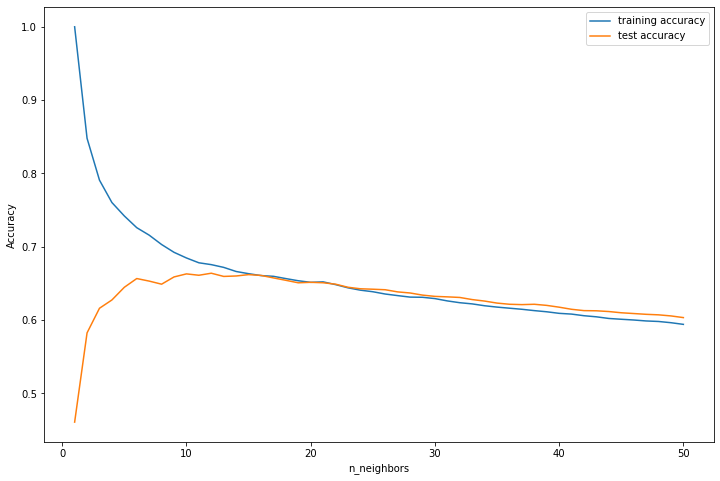

The optimal number of neighbors is 12


In [38]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [39]:
knn_reg = KNeighborsRegressor(algorithm = 'auto', #auto detect version in KNN fit best for our model 
                              n_neighbors = opt_neighbors) #optimal n-neighbors (using output from above)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_reg.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.6756
KNN Testing Score : 0.6639
KNN Train-Test Gap: 0.0117


In [40]:
scaler = StandardScaler()
scaler.fit(df_chef_1)
x_scaled = scaler.transform(df_chef_1)
x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df.columns = df_chef_1.columns
x_scaled_df.describe().round(2)
# Creating train&test set using Standardized Dataset
x_train_std, x_test_std, y_train_std, y_test_std = train_test_split(
            x_scaled_df,
            df_chef_target_1,
            test_size = 0.25,
            random_state = 219)

# Finding the optimal number of neighbors
training_accuracy_std = []
test_accuracy_std = []

neighbors_settings_std = range(1, 51)

for n_neighbors in neighbors_settings_std:
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_std, y_train_std)
    training_accuracy_std.append(clf.score(x_train_std, y_train_std))
    test_accuracy_std.append(clf.score(x_test_std, y_test_std))
    
opt_neighbors_std = test_accuracy_std.index(max(test_accuracy_std)) + 1

knn_w = KNeighborsRegressor(algorithm = "auto", n_neighbors = opt_neighbors_std)
knn_w_fit = knn_w.fit(x_train_std, y_train_std)
knn_w_y_predict = knn_w_fit.predict(x_test_std)

knn_w_train_score = knn_w.score(x_train_std, y_train_std).round(4)
knn_w_test_score  = knn_w.score(x_test_std, y_test_std).round(4)
knn_w_test_gap = abs(knn_w_train_score - knn_w_test_score).round(4)

print('KNN w Training Score :', knn_w_train_score)  
print('KNN w Testing Score  :',  knn_w_test_score) 
print('KNN w Train-Test Gap :', knn_w_test_gap)

KNN w Training Score : 0.5511
KNN w Testing Score  : 0.542
KNN w Train-Test Gap : 0.0091


In [41]:
print(f"""
Model      Train Score      Test Score      Gap             Model Size      
-----      -----------      ----------      ----------      ----------     
OLS        {OLS_train_score}           {OLS_test_score}           {OLS_test_gap}           {len(lr_model_lst)}           
Lasso      {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}         {len(lasso_model_lst)}
ARD        {ard_train_score}           {ard_test_score}           {ard_test_gap}         {len(ard_model_lst)}
KNN        {knn_opt_score_train}           {knn_opt_score_test}           {knn_opt_test_gap}         {"N/A"}
KNN Stand  {knn_w_train_score}           {knn_w_test_score}           {knn_w_test_gap}           {"N/A"}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD', 'KNN', 'KNN Standardized'],
           
    'Training' : [OLS_train_score, lasso_train_score,
                                   ard_train_score, knn_opt_score_train, knn_w_train_score],
           
    'Testing'  : [OLS_test_score, lasso_test_score,
                                   ard_test_score, knn_opt_score_test, knn_w_test_score],
                    
    'Train-Test Gap' : [OLS_test_gap, lasso_test_gap,
                                        ard_test_gap, knn_opt_test_gap, knn_w_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst), "N/A", "N/A"],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst, "N/A", "N/A"]}


Model      Train Score      Test Score      Gap             Model Size      
-----      -----------      ----------      ----------      ----------     
OLS        0.7182           0.7179           0.0003           16           
Lasso      0.6523           0.6672           0.0149         37
ARD        0.7137           0.7258           0.0121         70
KNN        0.6756           0.6639           0.0117         N/A
KNN Stand  0.5511           0.542           0.0091           N/A



### COMPARISON OF MODELS
By only looking at the performance of my test scores I should have picked ARD model as my primary model, because it has 0.73 performance on the Test Score. 
On the other hand, when we look at the gap between our training and testing score I can say that **OLS** model is outstanding and has the lead amongst other models. 
With smaller model size and less gap and very close testing score pushed me to pick **OLS** as my primary model to conclude this analysis on the REVENUE. 
**OLS** is used for estimating the unknown parameters by creating a model which will minimize the sum of the squared errors between the observed data and the predicted one. **OLS** in this particular analysis got the test score very similar to the training score. 
**OLS** prediction of data would be better than other models in this case. 